**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [24]:
# write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from IPython.display import display
from scipy import interpolate
from scipy import optimize
from types import SimpleNamespace
import time
import sympy as sm
from scipy import linalg
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [25]:
%load_ext autoreload
%autoreload 2

import exam_question1 as LS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
G = [1.0, 2.0]
alpha = 0.5
nu = (1)/(2*(16**2))
kappa = 1.0
tau = 0.30
wage = 1.0
tax_wage = (1-tau)*wage

In [27]:
expected_l = (-kappa+(kappa**2 +4*(alpha/nu)*tax_wage**2)**(1/2))/(2*tax_wage)
print(expected_l)

15.30165022719559


In [28]:
for g in [1, 2]:
    optimal_L = LS.optimal_labor_supply(alpha, nu, kappa, tau, wage)
    expected_L = (-kappa+(kappa**2 +4*(alpha/nu)*tax_wage**2)**(1/2))/(2*tax_wage)
    print(f"The optimal labor supply for G={g} is {optimal_L}")
    print(f"The expected labor supply for G={g} is {expected_L}")
    print(f"Are the two values equal? {np.allclose(optimal_L, expected_L, atol=1e-8)}")

The optimal labor supply for G=1 is 15.301650159969068
The expected labor supply for G=1 is 15.30165022719559
Are the two values equal? True
The optimal labor supply for G=2 is 15.301650159969068
The expected labor supply for G=2 is 15.30165022719559
Are the two values equal? True


Based on the code of the Python file exam_question1 we can see that the optimized value is the same as the suggested in this case the Gov consumption doesn't inffluence the Labor Supply

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [29]:
# write your code here
N = 1000
w_vec = np.linspace(0.5,1.5,N)
L_vec = np.zeros(N)

for i in range(N):
    L_vec[i] = LS.expected_L(kappa,alpha,nu,w_vec[i])


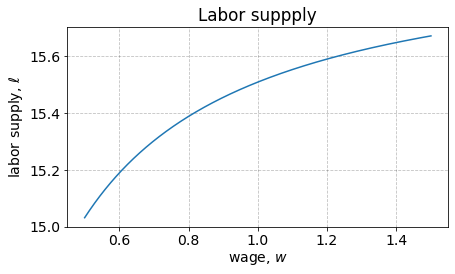

In [30]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(w_vec,L_vec,'-')
ax.set_ylabel('labor supply, $\ell$')
ax.set_xlabel('wage, $w$')
ax.set_title('Labor suppply')

fig.tight_layout(pad=1.0)

The graph appears to be corrrect based on the economic theory because there is a positive trend. So the wages affect in a positive way the labor supply, but each time the impact is of less magnitude


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [32]:
# write your code here
N = 1000
tau_vec = np.linspace(0.1,1.0,N)
L_vec = np.zeros(N)
G_vec = np.zeros(N)
u_vec = np.zeros(N)
G = 1

for i in range(N):
    # Calculate the optimal labor supply given the initial gov consumption of 1
    labor_supply = LS.optimal_labor_supply(alpha,nu,kappa,tau_vec[i],wage)
    # Calculate the government consumption
    gov_consumption = LS.gov_endogenous(alpha,nu,kappa,tau_vec[i],wage) 
    # Calculate the final utility
    utility = LS.value_of_choice(labor_supply,G,alpha,nu,kappa,tau,wage)
    #Store values in the vectors
    G_vec[i] = gov_consumption
    L_vec[i] = labor_supply
    u_vec[i] = utility

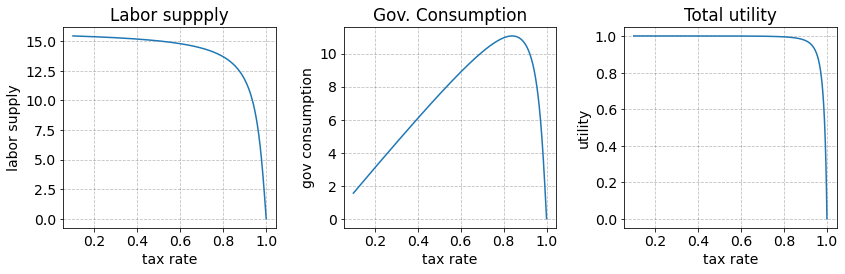

In [33]:
# Plot the government consumption and the optimal labor supply
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,3,1)
ax.plot(tau_vec,L_vec,'-')
ax.set_ylabel('labor supply')
ax.set_xlabel('tax rate')
ax.set_title('Labor suppply')

ax = fig.add_subplot(1,3,2)
ax.plot(tau_vec,G_vec,'-')
ax.set_ylabel('gov consumption')
ax.set_xlabel('tax rate')
ax.set_title('Gov. Consumption')

ax = fig.add_subplot(1,3,3)
ax.plot(tau_vec,u_vec,'-')
ax.set_ylabel('utility')
ax.set_xlabel('tax rate')
ax.set_title('Total utility')

fig.tight_layout(pad=1.0)

In the graph the optimal labor supply changes in a very little proportion compared with the goverment consumption

The taxes affect in a negative way the labor supply, and at low rates in a positive way to the gov consumption. At the end when we mixed both effects on the utility the effect is ambigous.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [34]:
alpha = 0.5
nu = (1)/(2*(16**2))
kappa = 1.0
tau = 0.30
wage = 1.0
tax_wage = (1-tau)*wage

In [35]:
# write your code here
optimal_tau = LS.optimal_tau(alpha, nu, kappa, wage)
print("Optimal value of tau for maximizing utility:", optimal_tau)

Optimal value of tau for maximizing utility: 0.5145302358265487


In [37]:
tau = 0.5145302358265487
L = LS.optimal_labor_supply(alpha,nu,kappa,tau,wage)
G = LS.gov_endogenous(alpha,nu,kappa,tau,wage)
new_utility = LS.value_of_choice(L,G,alpha,nu,kappa,tau,wage)
print(f'The utility with the optimal tax rate is {new_utility}')

The utility with the optimal tax rate is 1.859199253297711


c:\Users\masat\Documents\projects-2023-team-copenhagen-1\exam project\exam_question1.py:16: RuntimeWarning: divide by zero encountered in log
  positive = np.log(C**alpha*G**(1-alpha))


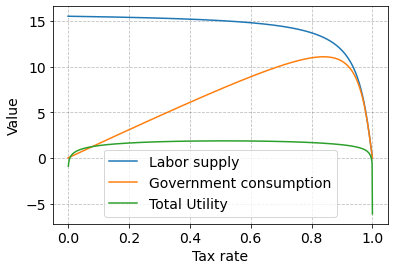

In [39]:
N = 1000
tau_vec = np.linspace(0,1.0,N)
L_vec = np.zeros(N)
G_vec = np.zeros(N)
u_vec = np.zeros(N)

# Calculate and store values
for i in range(1000):        
# Calculate the optimal labor supply
    L_vec[i] = LS.optimal_labor_supply(alpha, nu, kappa, tau_vec[i], wage)

# Calculate the government consumption
    G_vec[i] = LS.gov_endogenous(alpha,nu,kappa,tau_vec[i],wage)

# Calculate the optimal utility
    u_vec[i] = LS.value_of_choice(L_vec[i],G_vec[i],alpha,nu,kappa,tau_vec[i],wage)


# Plot the labor supply and the government consumption
plt.plot(tau_vec, L_vec, '-', label='Labor supply')
plt.plot(tau_vec, G_vec, '-', label='Government consumption')
plt.plot(tau_vec, u_vec, '-', label='Total Utility')
plt.xlabel('Tax rate')
plt.ylabel('Value')
plt.legend()
plt.show()

Here we can observe that the value of the tax rate that is optimal indicates the maximum point of the function of the utility for the worker.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [40]:
import exam_question11 as LSU

In [41]:
sigma = 1.001
rho = 1.001
epsilon = 1
wage = 1.0
alpha = 0.5
nu = (1)/(2*(16**2))
kappa = 1.0
tau = 0.3381713132610841


In [42]:
ll = LSU.solve_G(alpha, sigma, rho, nu, epsilon, kappa, tau, wage)
print(f'The value of the Gov consumption given the fixed values is {ll}')

The value of the Gov consumption given the fixed values is 0.05203826682041455


In [43]:
yyy = LSU.optimal_tax(alpha, sigma, rho, nu, epsilon, kappa, wage)
print(f'An the tax rate that maximizes the utility of the worker is {yyy}')

An the tax rate that maximizes the utility of the worker is 0.5123505359799203


In [44]:
sigma = 1.5
rho = 1.5
epsilon = 1
wage = 1.0
alpha = 0.5
nu = (1)/(2*(16**2))
kappa = 1.0
tau = 0.3381713132610841

In [45]:
ll = LSU.solve_G(alpha, sigma, rho, nu, epsilon, kappa, tau, wage)
print(f'The value of the Gov consumption given the fixed values is {ll}')

The value of the Gov consumption given the fixed values is 8.116110069815115


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [46]:
# write your code here  
mmm = LSU.optimal_tax(alpha, sigma, rho, nu, epsilon, kappa, wage)
print(f'The tax rate that maximizes the utility of the worker given the fixed paramteters is {mmm}')

The tax rate that maximizes the utility of the worker given the fixed paramteters is 0.5208320624727577


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

For kappa = 1.0, the maximum profit is: 0.25
For kappa = 2.0, the maximum profit is: 1.0


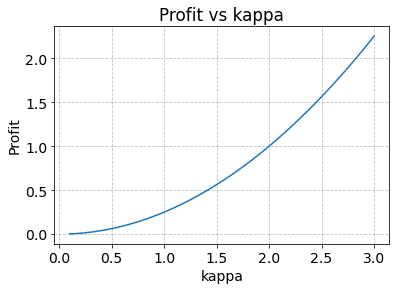

In [47]:
eta=0.5
w=1.0

def calculate_profit(kappa):
    ell = (((1 - eta) * kappa) / w) ** (1 / eta)
    price = kappa * ell ** (-eta)
    profit = price * ell - w * ell
    return profit

kappa_values = [1.0, 2.0]

for kappa in kappa_values:
    profit = calculate_profit(kappa)
    print(f"For kappa = {kappa}, the maximum profit is: {profit}")

kappa_values = np.linspace(0.1, 3.0, 100)  # Generate 100 values between 0.1 and 3.0

profits = [calculate_profit(kappa) for kappa in kappa_values]

# Plotting
plt.plot(kappa_values, profits)
plt.xlabel('kappa')
plt.ylabel('Profit')
plt.title('Profit vs kappa')
plt.grid(True)
plt.show()


The graph provides insights into the relationship between kappa and profit, showing the initial positive impact.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [48]:
from exam_project import ExAnteValueCalculator

In [49]:
# Set the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)

T = 120  # Planning horizon
K = 1000 # Number of random shock series

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator(eta, w, rho, iota, sigma_epsilon, R, T, K)

# Calculate the ex ante value
ex_ante_value = calculator.calculate_ex_ante_value()

# Print the ex ante value
print("Ex Ante Value (H):", ex_ante_value)

Ex Ante Value (H): 30.3320799579871


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [50]:
from exam_project import ExAnteValueCalculator_a

In [51]:
# Set the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120  # Planning horizon
K = 1000  # Number of random shock series
Delta = 0.05

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator_a(eta, w, rho, iota, sigma_epsilon, R, T, K, Delta)

# Calculate the ex ante value
ex_ante_value = calculator.calculate_ex_ante_value()

# Print the ex ante value
print("Ex Ante Value (H) with Delta =", Delta, ":", ex_ante_value)

Ex Ante Value (H) with Delta = 0.05 : 31.44672265077747


**Answer:** As a result, the case with Delta = 0.05 may have better profitability compared to the case without Delta because the adjustment cost encourages the hairdresser to maintain a more stable level of services over time, avoiding excessive and potentially costly adjustments.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [52]:
from exam_project import ExAnteValueCalculator_b

Optimal Delta: 0.12121212121212122
Maximum Ex Ante Value (H): 31.478705200372758


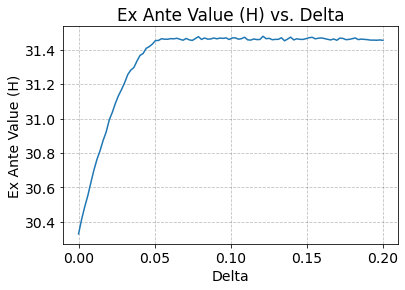

In [53]:
# Set the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120  # Planning horizon
K = 1000  # Number of random shock series

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator_b(eta, w, rho, iota, sigma_epsilon, R, T, K)

# Define the range of delta values
delta_values = np.linspace(0, 0.2, 100)

# Calculate the optimal delta and maximum ex ante value
optimal_delta, max_ex_ante_value, ex_ante_values = calculator.find_optimal_delta(delta_values)

# Print the results
print("Optimal Delta:", optimal_delta)
print("Maximum Ex Ante Value (H):", max_ex_ante_value)

# Plot the results
calculator.plot_ex_ante_values(delta_values, ex_ante_values)

After the optimal Delta, the maximum Ex Ante Value stagnates so it's not efficient to increase Delta more than optimal value.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



One alternative policy that could potentially improve profitability is to adjust the hairdresser's wage (w) based on the previous period's profit. The idea is to increase the wage by 5% if the previous period's profit was positive and remain unchanged it if the profit was negative. By adjusting the wage dynamically based on profitability, the salon can adapt to changing market conditions and potentially improve its overall profitability.

Here's the implementation of the alternative policy:

In [54]:
from exam_project import ExAnteValueCalculator_c

In [55]:
# Set the parameters
eta = 0.5
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
T = 120  # Planning horizon
K = 1000  # Number of random shock series
delta = 0.05  # Delta value for the alternative policy

# Create an instance of ExAnteValueCalculator
calculator = ExAnteValueCalculator_c(eta, rho, iota, sigma_epsilon, R, T, K)

# Calculate the ex ante value with the alternative policy
ex_ante_value = calculator.calculate_ex_ante_value_b(delta)

print("Ex Ante Value (H) with the alternative policy:", ex_ante_value)

Ex Ante Value (H) with the alternative policy: 28.841606124972056


**Answer:** The reason for the lower ex ante value under the alternative policy could be attributed to the fact that adjusting the wage based on profitability may introduce additional volatility or instability in the system. By increasing the wage when the profit is positive, the salon incurs higher labor costs, which may not be fully offset by the increased profitability. On the other hand, keeping the wage unchanged when the profit is negative does not allow for immediate cost reductions to mitigate the loss.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [56]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [57]:
# write your code here
np.random.seed(1986)
x0s = -600 + 1200*np.random.uniform(size=(5000,2)) # in [-600,600]
xs = np.empty((5000,2))
fs = np.empty(5000)

In [58]:
print(f'min(x0s) = {np.min(x0s):.2f}, max(x0s) = {np.max(x0s):.2f}')

min(x0s) = -599.82, max(x0s) = 599.99


In [59]:
def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

# Set the random seed.
np.random.seed(1986)
# Create a list of initial guesses.
x0s = -600 + 1200 * np.random.uniform(size=(5000, 2))  # in [-600,600]
# Create lists to store the results.
xs = np.empty((5000, 2))
fs = np.empty(5000)

# Create a random vector x0.
xk = np.random.uniform(-600, 600, size=2)

# Calculate chi^k.
chi = 0.50 * (2 / (1 + np.exp((xk - 10) / 100)))
# Set the initial guess for the optimizer.
x_k0 = chi * xk + (1 - chi) * x0s

x0 = np.random.uniform(-600, 600, size=2)
# Print the minimum and maximum values of x0s.
print(f'min(x0s) = {np.min(x0s):.2f}, max(x0s) = {np.max(x0s):.2f}')

# Initialize the best solution.
fopt = np.inf
xopt = np.nan
# Iterate over the initial guesses.
for i, x0 in enumerate(x_k0):

    # a. optimize
    result = optimize.minimize(griewank, x0, method='BFGS', options={'maxiter': 1000})
    # Store the result.
    xs[i, :] = result.x
    f = result.fun

    # b. print first 10 or if better than seen yet
    if i < 10 or f < fopt:  # plot 10 first or if improving
        if f < fopt:
            fopt = f
            xopt = xs[i, :]

        print(f'{i:4d}: x0 = ({x0[0]:7.2f},{x0[1]:7.2f})', end='')
        print(f' -> converged at ({xs[i][0]:7.2f},{xs[i][1]:7.2f}) with f = {f:12.8f}')

# best solution
print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')


min(x0s) = -599.82, max(x0s) = 599.99
   0: x0 = (-263.58,-236.01) -> converged at (-260.62,-235.23) with f =  30.83727703
   1: x0 = (-261.15, 214.78) -> converged at (-260.62, 217.48) with f =  28.82591580
   2: x0 = (-265.05, 107.72) -> converged at (-263.76, 106.52) with f =  20.24084886
   3: x0 = (-274.78,  79.65) -> converged at (-276.32,  79.89) with f =  20.69525257
   4: x0 = (-256.15, 116.47) -> converged at (-257.48, 115.40) with f =  19.91506600
   5: x0 = (-256.15, 164.93) -> converged at (-254.34, 164.22) with f =  22.92944925
   6: x0 = (-281.05, 137.93) -> converged at (-279.46, 137.59) with f =  24.27205721
   7: x0 = (-279.59, -37.83) -> converged at (-279.46, -39.95) with f =  19.93381656
   8: x0 = (-264.57, -40.60) -> converged at (-266.90, -39.95) with f =  18.21736666
   9: x0 = (-263.05, 211.87) -> converged at (-263.76, 213.04) with f =  28.75957133
  13: x0 = (-257.05, -21.61) -> converged at (-254.34, -22.19) with f =  16.30376320
  15: x0 = (-247.15,  34.91

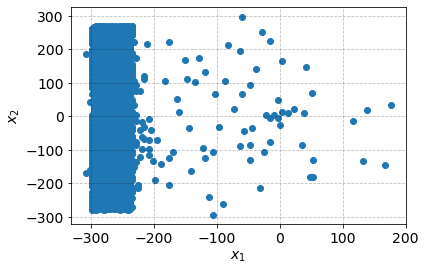

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(xs[:,0],xs[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

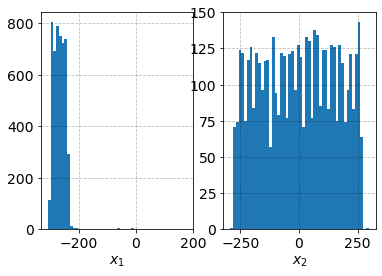

In [61]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(xs[:,0],bins=50)
ax.set_xlabel('$x_1$');

ax = fig.add_subplot(1,2,2)
ax.hist(xs[:,1],bins=50)
ax.set_xlabel('$x_2$');

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

Below is the case of $\underline{K} = 100$

In [62]:
def griewank(x):
    return griewank_(x[0], x[1])

def griewank_(x1, x2):
    A = x1**2 / 4000 + x2**2 / 4000
    B = np.cos(x1 / np.sqrt(1)) * np.cos(x2 / np.sqrt(2))
    return A - B + 1

# Set the random seed.
np.random.seed(1986)
# Create a list of initial guesses.
x0s = -600 + 1200 * np.random.uniform(size=(5000, 2))  # in [-600,600]
# Create lists to store the results.
xs = np.empty((5000, 2))
fs = np.empty(5000)

# Create a random vector x0.
xk = np.random.uniform(-600, 600, size=2)

# Calculate chi^k.
chi = 0.50 * (2 / (1 + np.exp((xk - 10) / 100)))
# Set the initial guess for the optimizer.
x_k0 = chi * xk + (1 - chi) * x0s

x0 = np.random.uniform(-600, 600, size=2)
# Print the minimum and maximum values of x0s.
print(f'min(x0s) = {np.min(x0s):.2f}, max(x0s) = {np.max(x0s):.2f}')

# Initialize the best solution.
fopt = np.inf
xopt = np.nan
# Iterate over the initial guesses.
for i, x0 in enumerate(x_k0):

    # a. optimize
    result = optimize.minimize(griewank, x0, method='L-BFGS-B', options={'maxiter': 1000, 'warm_start': 100})
    # Store the result.
    xs[i, :] = result.x
    f = result.fun

    # b. print first 10 or if better than seen yet
    if i < 10 or f < fopt:  # plot 10 first or if improving
        if f < fopt:
            fopt = f
            xopt = xs[i, :]

        print(f'{i:4d}: x0 = ({x0[0]:7.2f},{x0[1]:7.2f})', end='')
        print(f' -> converged at ({xs[i][0]:7.2f},{xs[i][1]:7.2f}) with f = {f:12.8f}')

# best solution
print(f'\nbest solution:\n x = ({xopt[0]:7.2f},{xopt[1]:7.2f}) -> f = {fopt:12.8f}')


min(x0s) = -599.82, max(x0s) = 599.99
   0: x0 = (-263.58,-236.01) -> converged at (-257.48,-239.67) with f =  30.95785204
   1: x0 = (-261.15, 214.78) -> converged at (-260.62, 217.48) with f =  28.82591580
   2: x0 = (-265.05, 107.72) -> converged at (-263.76, 106.52) with f =  20.24084886
   3: x0 = (-274.78,  79.65) -> converged at (-276.32,  79.89) with f =  20.69525257
   4: x0 = (-256.15, 116.47) -> converged at (-257.48, 115.40) with f =  19.91506600
   5: x0 = (-256.15, 164.93) -> converged at (-254.34, 164.22) with f =  22.92944925
   6: x0 = (-281.05, 137.93) -> converged at (-279.46, 137.59) with f =  24.27205721
   7: x0 = (-279.59, -37.83) -> converged at (-279.46, -39.95) with f =  19.93381656
   8: x0 = (-264.57, -40.60) -> converged at (-270.04, -44.38) with f =  18.73274736
   9: x0 = (-263.05, 211.87) -> converged at (-263.76, 213.04) with f =  28.75957133
  11: x0 = (-245.82,-126.24) -> converged at (-153.86, -84.33) with f =   7.70094603
  78: x0 = (-274.76, 109.13

<ipython-input-62-ea1990f6a553>:36: OptimizeWarning: Unknown solver options: warm_start
  result = optimize.minimize(griewank, x0, method='L-BFGS-B', options={'maxiter': 1000, 'warm_start': 100})


 208: x0 = (-276.08, -30.78) -> converged at (   9.42,  22.19) with f =   0.14544232
2319: x0 = (-282.28,  93.97) -> converged at (  18.84,   8.88) with f =   0.10850154
3500: x0 = (-260.04,  96.90) -> converged at ( -18.84,   0.00) with f =   0.08878205

best solution:
 x = ( -18.84,   0.00) -> f =   0.08878205


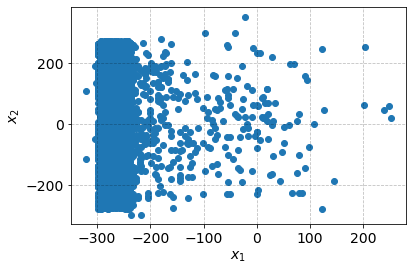

In [63]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(xs[:,0],xs[:,1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

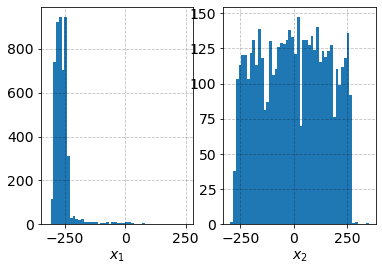

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.hist(xs[:,0],bins=50)
ax.set_xlabel('$x_1$');

ax = fig.add_subplot(1,2,2)
ax.hist(xs[:,1],bins=50)
ax.set_xlabel('$x_2$');

**Answer:** In summary, as you can see in the scatter plot, increasing $\underline{K}$ to a larger value extends the warm-up phase, allowing for more exploration of the solution space. While this can provide a broader initial set of solutions, it resulted in slower convergence during the refined optimization phase. The choice of K_under should strike a balance between exploration and exploitation based on the problem's characteristics and desired convergence speed.